In [1]:
import sys
print(sys.version)



3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]


In [2]:
import pandas as pd

df = pd.read_csv("UCI_Credit_Card.csv")


In [3]:
df.shape

(30000, 25)

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.dtypes


ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [6]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

In [8]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df['AGE'].describe()


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [11]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [12]:
df_clean = df.dropna()


In [13]:
df['AGE_missing_flag'] = df['AGE'].isnull().astype(int)
df['AGE'] = df['AGE'].fillna(df['AGE'].median())


In [14]:
df = df.drop_duplicates()


In [15]:
df = df.drop_duplicates(subset=['ID'], keep='last')


In [16]:
upper_cap = df['LIMIT_BAL'].quantile(0.99)
df['LIMIT_BAL'] = df['LIMIT_BAL'].clip(upper=upper_cap)


In [17]:
df['default.payment.next.month'].value_counts(normalize=True)


default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [18]:
df = df[df['default.payment.next.month'].isin([0, 1])]


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')

In [20]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_missing_flag
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0
mean,15000.500000,166808.656000,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.0
std,8660.398374,127584.472995,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.0
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.0
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.0
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.0
max,30000.000000,500000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,0.0


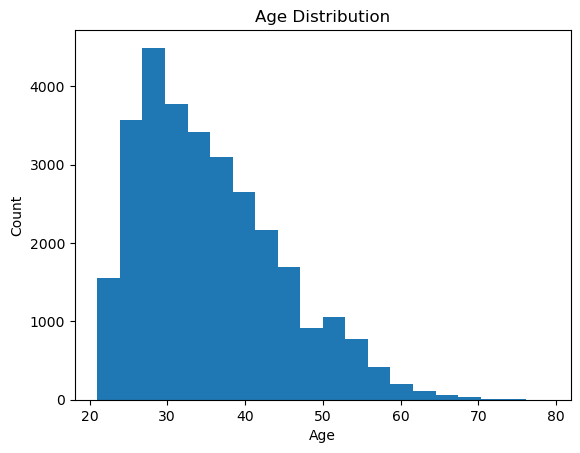

In [21]:
import matplotlib.pyplot as plt

plt.hist(df['AGE'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


In [22]:
df.groupby('default.payment.next.month')['LIMIT_BAL'].mean()


default.payment.next.month
0    177318.609827
1    129805.256178
Name: LIMIT_BAL, dtype: float64

In [23]:
df.groupby('default.payment.next.month')['PAY_0'].mean()


default.payment.next.month
0   -0.211222
1    0.668174
Name: PAY_0, dtype: float64

In [24]:
df.corr()['default.payment.next.month'].sort_values(ascending=False)


default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.154572
AGE_missing_flag         

In [25]:
df_fe = df.copy()


In [26]:
pay_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

df_fe['num_late_payments'] = (df_fe[pay_cols] > 0).sum(axis=1)


In [27]:
df_fe['avg_payment_delay'] = df_fe[pay_cols].mean(axis=1)


In [28]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
df_fe[bill_cols] = df_fe[bill_cols].fillna(0)
df_fe[bill_cols] = df_fe[bill_cols].clip(lower=0)
df_fe['avg_bill_amount'] = df_fe[bill_cols].mean(axis=1)
df_fe['credit_utilization'] = df_fe['avg_bill_amount'] / df_fe['LIMIT_BAL']
df_fe['credit_utilization'] = df_fe['credit_utilization'].replace([float('inf')], 0)



In [29]:
pay_amt_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
df_fe[pay_amt_cols] = df_fe[pay_amt_cols].fillna(0)

df_fe['avg_payment_amount'] = df_fe[pay_amt_cols].mean(axis=1)
df_fe['payment_to_bill_ratio'] = df_fe['avg_payment_amount'] / (df_fe['avg_bill_amount'] + 1)


In [30]:
df_fe['payment_to_bill_ratio'].isna().sum()


np.int64(0)

In [31]:
mask = df_fe['payment_to_bill_ratio'].isna()
df_fe.loc[mask, bill_cols + pay_amt_cols + ['avg_bill_amount','avg_payment_amount','LIMIT_BAL','credit_utilization']].head(10)


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,avg_bill_amount,avg_payment_amount,LIMIT_BAL,credit_utilization


In [32]:
df_fe['risk_bucket'] = pd.cut(
    df_fe['credit_utilization'],
    bins=[-1, 0.3, 0.7, 10],
    labels=['Low','Medium','High']
)


In [33]:
df_model = df_fe.drop(columns=pay_cols + bill_cols + pay_amt_cols)


In [34]:
df_model.head()
df_model.shape



(30000, 15)

In [35]:
X = df_model.drop(columns=['default.payment.next.month', 'risk_bucket'])
y = df_model['default.payment.next.month']


In [36]:
X.shape
y.shape

(30000,)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [38]:
y_train.value_counts(normalize=True)

default.payment.next.month
0    0.778792
1    0.221208
Name: proportion, dtype: float64

In [39]:
y_test.value_counts(normalize=True)

default.payment.next.month
0    0.778833
1    0.221167
Name: proportion, dtype: float64

In [40]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=50000, class_weight='balanced')
log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=50000)

In [41]:
log_model.coef_


array([[-3.97005199e-06, -2.10336294e-06, -1.58358678e-01,
        -6.31670625e-02, -1.11609978e-01,  4.50976359e-03,
         0.00000000e+00,  6.57229153e-01, -3.05210213e-01,
         1.86113689e-06,  1.82550251e-01, -2.07875675e-05,
        -8.19880391e-06]])

In [42]:
from sklearn.metrics import roc_auc_score, classification_report
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]


In [43]:
roc_auc_score(y_test, y_prob_log)


np.float64(0.7429914929211422)

In [44]:
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4673
           1       0.45      0.54      0.49      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.68      0.66      6000
weighted avg       0.77      0.75      0.76      6000



In [45]:
!pip install xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)


In [46]:
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [47]:
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


XGBoost ROC-AUC: 0.7679570190375178


In [48]:
import pandas as pd
feature_importance = pd.Series(
    xgb_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)


In [49]:
feature_importance.head(10)


num_late_payments        0.564301
avg_payment_delay        0.170728
avg_payment_amount       0.038505
LIMIT_BAL                0.030362
avg_bill_amount          0.029050
credit_utilization       0.028721
payment_to_bill_ratio    0.026917
EDUCATION                0.024456
ID                       0.022389
MARRIAGE                 0.022126
dtype: float32

In [50]:
%pip install -U mlflow


Note: you may need to restart the kernel to use updated packages.


In [51]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost

mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("credit_default_risk")


/opt/anaconda3/lib/python3.13/site-packages/mlflow/tracking/_tracking_service/utils.py:178: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri, store_uri)


<Experiment: artifact_location='file:///Users/karthik/mlruns/505795458434485371', creation_time=1770592196718, experiment_id='505795458434485371', last_update_time=1770592196718, lifecycle_stage='active', name='credit_default_risk', tags={}>

In [52]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

def get_metrics(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold).astype(int)
    return {
        "roc_auc": roc_auc_score(y_true, y_prob),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
    }


In [53]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run(run_name="logreg_baseline"):
    params = {"max_iter": 50000, "class_weight": "balanced"}
    mlflow.log_params(params)

    log_model = LogisticRegression(max_iter=50000, class_weight="balanced")
    log_model.fit(X_train, y_train)

    y_prob = log_model.predict_proba(X_test)[:, 1]
    metrics = get_metrics(y_test, y_prob, threshold=0.5)
    mlflow.log_metrics(metrics)

    mlflow.sklearn.log_model(log_model, name="model")

    with open("feature_list.txt", "w") as f:
        f.write("\n".join(list(X_train.columns)))
    mlflow.log_artifact("feature_list.txt")

print("Logged Logistic Regression run ✅")


/opt/anaconda3/lib/python3.13/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


Logged Logistic Regression run ✅


In [54]:
from xgboost import XGBClassifier

with mlflow.start_run(run_name="xgboost_v1"):
    params = {
        "n_estimators": 200,
        "max_depth": 5,
        "learning_rate": 0.05,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "eval_metric": "logloss",
        "random_state": 42,
    }
    mlflow.log_params(params)

    xgb_model = XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)

    y_prob = xgb_model.predict_proba(X_test)[:, 1]
    metrics = get_metrics(y_test, y_prob, threshold=0.5)
    mlflow.log_metrics(metrics)

    mlflow.xgboost.log_model(xgb_model, name="model")

print("Logged XGBoost run ✅")


Logged XGBoost run ✅


In [55]:
runs = mlflow.search_runs(experiment_names=["credit_default_risk"])
runs.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.recall', 'metrics.precision', 'metrics.f1',
       'metrics.roc_auc', 'params.learning_rate', 'params.max_depth',
       'params.subsample', 'params.eval_metric', 'params.n_estimators',
       'params.colsample_bytree', 'params.random_state', 'params.class_weight',
       'params.max_iter', 'tags.mlflow.user', 'tags.mlflow.source.name',
       'tags.mlflow.runName', 'tags.mlflow.source.type'],
      dtype='object')

In [56]:
runs = mlflow.search_runs(experiment_names=["credit_default_risk"])

cols = ["run_id", "tags.mlflow.runName",
        "metrics.roc_auc", "metrics.precision", "metrics.recall", "metrics.f1"]

runs[cols].sort_values(by="metrics.roc_auc", ascending=False)


,run_id,tags.mlflow.runName,metrics.roc_auc,metrics.precision,metrics.recall,metrics.f1
0,6b8908d398724890a553a3b71bedf2e5,xgboost_v1,0.767957,0.607397,0.321778,0.420690
2,e31375460e804a899eaec57d42c423f4,xgboost_v1,0.767957,0.607397,0.321778,0.420690
4,9ee9c504e82a4695bc124476376998e4,xgboost_v1,0.767957,0.607397,0.321778,0.420690
6,6337706874ce41f4a585bac6a261c0a4,xgboost_v1,0.767957,0.607397,0.321778,0.420690
7,75ccc548565d4ccb8478a1bfb204fea6,xgboost_v1,0.767957,0.607397,0.321778,0.420690
8,2c0d4ff64439415e8f172cba979cf97e,xgboost_v1,0.767957,0.607397,0.321778,0.420690
1,19b57bb8242349a8b6d4ddbf38d46cbb,logreg_baseline,0.742991,0.451189,0.543331,0.492991
3,101c5337ea7144a3bb1f02982e9a1593,logreg_baseline,0.742991,0.451189,0.543331,0.492991
5,52c82ddfc1604ef7ac9641ef12aeb828,logreg_baseline,0.742991,0.451189,0.543331,0.492991
9,bba4aed6b81149348867cf12c9ddc08f,logreg_baseline,0.742991,0.451189,0.543331,0.492991


In [57]:
import pandas as pd
from datetime import datetime

MODEL_VERSION = "xgb_v1_auc_0.768"
SCORING_DATE = datetime.now().strftime("%Y-%m-%d")


In [58]:
risk_score = xgb_model.predict_proba(X_test)[:, 1]

In [59]:
def bucket(score):
    if score >= 0.7:
        return "High"
    elif score >= 0.4:
        return "Medium"
    else:
        return "Low"

risk_bucket = [bucket(s) for s in risk_score]


In [60]:
pred_df = pd.DataFrame({
    "customer_id": df.loc[X_test.index, "ID"],
    "risk_score": risk_score,
    "risk_bucket": risk_bucket,
    "model_version": MODEL_VERSION,
    "scoring_date": SCORING_DATE
})


In [61]:
import os
os.makedirs("deploy_outputs", exist_ok=True)


In [62]:
output_path = f"deploy_outputs/predictions_{MODEL_VERSION}_{SCORING_DATE}.csv"
pred_df.to_csv(output_path, index=False)
output_path

'deploy_outputs/predictions_xgb_v1_auc_0.768_2026-02-10.csv'

In [63]:
%pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [64]:
import os
os.makedirs("models", exist_ok=True)
import joblib
joblib.dump(xgb_model, f"models/{MODEL_VERSION}.joblib")


['models/xgb_v1_auc_0.768.joblib']

In [65]:
pred_df.head()

,customer_id,risk_score,risk_bucket,model_version,scoring_date
6907,6908,0.156433,Low,xgb_v1_auc_0.768,2026-02-10
24575,24576,0.122110,Low,xgb_v1_auc_0.768,2026-02-10
26766,26767,0.188001,Low,xgb_v1_auc_0.768,2026-02-10
2156,2157,0.101701,Low,xgb_v1_auc_0.768,2026-02-10
3179,3180,0.085461,Low,xgb_v1_auc_0.768,2026-02-10


In [66]:
output_path

'deploy_outputs/predictions_xgb_v1_auc_0.768_2026-02-10.csv'

In [67]:
import pandas as pd
import numpy as np

scores = pred_df[['customer_id', 'risk_score']].copy()

mid = len(scores) // 2
baseline_scores = scores.iloc[:mid]['risk_score']
current_scores  = scores.iloc[mid:]['risk_score']


In [68]:
def summarize_scores(s):
    return pd.Series({
        "count": len(s),
        "mean": s.mean(),
        "std": s.std(),
        "p10": s.quantile(0.10),
        "p50": s.quantile(0.50),
        "p90": s.quantile(0.90),
    })

pred_drift = pd.DataFrame({
    "baseline": summarize_scores(baseline_scores),
    "current": summarize_scores(current_scores),
})

pred_drift["delta"] = pred_drift["current"] - pred_drift["baseline"]
pred_drift


,baseline,current,delta
count,3000.000000,3000.000000,0.000000
mean,0.222612,0.220016,-0.002596
std,0.191090,0.185825,-0.005265
p10,0.053599,0.053912,0.000313
p50,0.146609,0.149374,0.002765
p90,0.547847,0.528547,-0.019300


In [69]:
drift_features = [
    "num_late_payments",
    "avg_payment_delay",
    "credit_utilization",
    "payment_to_bill_ratio",
    "LIMIT_BAL"
]


In [70]:
baseline_idx = pred_df.iloc[:mid].index
current_idx  = pred_df.iloc[mid:].index

baseline_X = df_model.loc[baseline_idx, drift_features]
current_X  = df_model.loc[current_idx, drift_features]


In [71]:
def feature_summary(baseline_col, current_col):
    return pd.Series({
        "baseline_mean": baseline_col.mean(),
        "current_mean": current_col.mean(),
        "mean_delta": current_col.mean() - baseline_col.mean(),
        "baseline_p50": baseline_col.quantile(0.5),
        "current_p50": current_col.quantile(0.5),
        "p50_delta": current_col.quantile(0.5) - baseline_col.quantile(0.5),
    })

drift_rows = []
for c in drift_features:
    row = feature_summary(baseline_X[c], current_X[c])
    row.name = c
    drift_rows.append(row)

feature_drift = pd.DataFrame(drift_rows)
feature_drift


,baseline_mean,current_mean,mean_delta,baseline_p50,current_p50,p50_delta
num_late_payments,0.857000,0.799333,-0.057667,0.000000,0.000000,0.000000
avg_payment_delay,-0.156833,-0.200722,-0.043889,0.000000,0.000000,0.000000
credit_utilization,0.380216,0.373855,-0.006362,0.297633,0.270342,-0.027290
payment_to_bill_ratio,1.532728,8.041161,6.508433,0.083898,0.085885,0.001988
LIMIT_BAL,166539.226667,168186.666667,1647.440000,140000.000000,140000.000000,0.000000


In [72]:
feature_drift["drift_flag"] = (feature_drift["mean_delta"].abs() > 0.05 * feature_drift["baseline_mean"].abs().replace(0, 1))
feature_drift


,baseline_mean,current_mean,mean_delta,baseline_p50,current_p50,p50_delta,drift_flag
num_late_payments,0.857000,0.799333,-0.057667,0.000000,0.000000,0.000000,True
avg_payment_delay,-0.156833,-0.200722,-0.043889,0.000000,0.000000,0.000000,True
credit_utilization,0.380216,0.373855,-0.006362,0.297633,0.270342,-0.027290,False
payment_to_bill_ratio,1.532728,8.041161,6.508433,0.083898,0.085885,0.001988,True
LIMIT_BAL,166539.226667,168186.666667,1647.440000,140000.000000,140000.000000,0.000000,False


In [73]:
import os
os.makedirs("monitoring", exist_ok=True)

pred_drift.to_csv(f"monitoring/prediction_drift_{SCORING_DATE}.csv")
feature_drift.to_csv(f"monitoring/feature_drift_{SCORING_DATE}.csv")


In [74]:
!pip install duckdb
import duckdb
import os

os.makedirs("deploy_outputs", exist_ok=True)

con = duckdb.connect()

con.register("predictions", pred_df)

high_risk_sql = con.execute("""
    SELECT
        customer_id,
        risk_score,
        risk_bucket,
        model_version,
        scoring_date
    FROM predictions
    WHERE risk_bucket = 'High'
    ORDER BY risk_score DESC
""").df()

high_risk_sql.to_csv(
    "deploy_outputs/high_risk_customers.sql_output.csv",
    index=False
)

high_risk_sql.head()


,customer_id,risk_score,risk_bucket,model_version,scoring_date
0,29771,0.923622,High,xgb_v1_auc_0.768,2026-02-10
1,20722,0.917052,High,xgb_v1_auc_0.768,2026-02-10
2,28055,0.910497,High,xgb_v1_auc_0.768,2026-02-10
3,27537,0.901077,High,xgb_v1_auc_0.768,2026-02-10
4,16555,0.899351,High,xgb_v1_auc_0.768,2026-02-10


In [75]:
import os
os.listdir("deploy_outputs")


['Book1.twb',
 'predictions_xgb_v1_auc_0.768_2026-02-10.csv',
 'predictions_xgb_v1_auc_0.768_2026-02-09.csv',
 'predictions_xgb_v1_auc_0.768_2026-02-08.csv',
 '.~Book1__58498.twbr',
 'high_risk_customers.sql_output.csv']

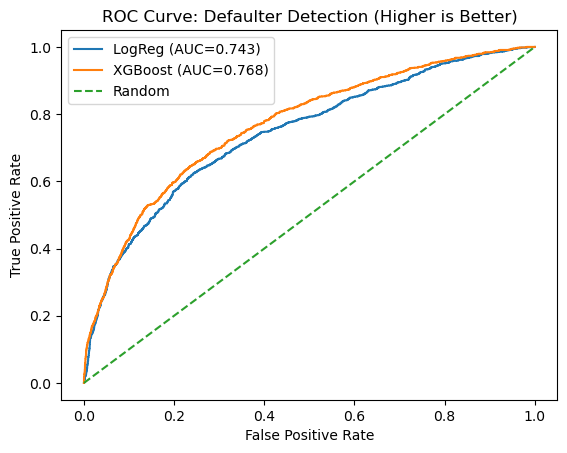

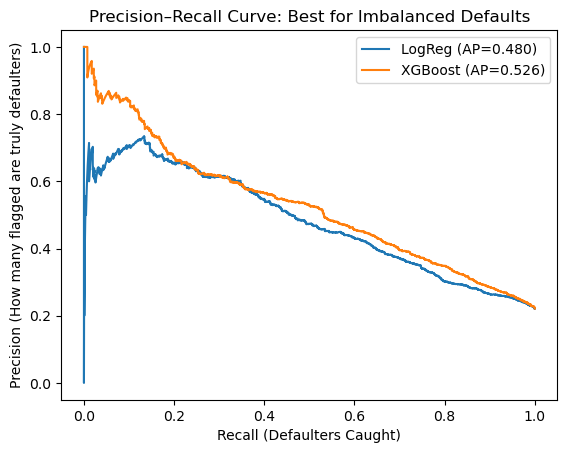

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay
)

def get_proba(model, X):
    """Works for sklearn models + many xgboost wrappers."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    p = model.predict(X)
    return np.array(p).reshape(-1)

def plot_roc_pr(logreg, xgb_model, X_test, y_test):
    p_lr  = get_proba(logreg, X_test)
    p_xgb = get_proba(xgb_model, X_test)

    fpr_lr, tpr_lr, _   = roc_curve(y_test, p_lr)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, p_xgb)
    auc_lr  = roc_auc_score(y_test, p_lr)
    auc_xgb = roc_auc_score(y_test, p_xgb)

    plt.figure()
    plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={auc_lr:.3f})")
    plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")
    plt.plot([0,1], [0,1], linestyle="--", label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve: Defaulter Detection (Higher is Better)")
    plt.legend()
    plt.show()

    prec_lr, rec_lr, _   = precision_recall_curve(y_test, p_lr)
    prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, p_xgb)
    ap_lr  = average_precision_score(y_test, p_lr)
    ap_xgb = average_precision_score(y_test, p_xgb)

    plt.figure()
    plt.plot(rec_lr, prec_lr, label=f"LogReg (AP={ap_lr:.3f})")
    plt.plot(rec_xgb, prec_xgb, label=f"XGBoost (AP={ap_xgb:.3f})")
    plt.xlabel("Recall (Defaulters Caught)")
    plt.ylabel("Precision (How many flagged are truly defaulters)")
    plt.title("Precision–Recall Curve: Best for Imbalanced Defaults")
    plt.legend()
    plt.show()

plot_roc_pr(log_model, xgb_model, X_test, y_test)
